In [235]:
import numpy as np
import torch
import pprint
import matplotlib.pyplot as plt
import sys
import pickle
import argparse
import logging
import os
import heapq
import random
import pickle
import sys
import pandas as pd
import json
import gzip




In [5]:
exp_path = '/Users/laurengreenspan/GitDLs/TreeNiNNew/code_ginkgo/recnn/experiments/ginkgo/'

In [220]:
jet_algorithms=['kt','antikt','truth','ptdesc']
learning_rate=2e-3
decay=0.9
batch_size=32
num_epoch=30
hidden_dims=[20,40,80,160,320,640]
jet_number=10000
Nfeatures=4
results_dictionary = []
metrics_history = []

for i in range(len(jet_algorithms)):
    for j in range(len(hidden_dims)):
        
        jet_algorithm = jet_algorithms[i]
        hidden_dim = hidden_dims[j]
        job_name = 'ginkgo_'+str(jet_algorithm)+'_lr_'+str(learning_rate)+'_decay_'+str(decay)+'_batch_'+str(batch_size)+'_epochs_'+str(num_epoch)+'_hidden_'+str(hidden_dim)+'_Njets_'+str(jet_number)+'_features_'+str(Nfeatures)
        try_path =exp_path+job_name+'/run_0'
        
        with open(try_path+'/roc_'+str(num_epoch)+'_ginkgo_'+str(jet_algorithm)+'_'+str(jet_number)+'jets.pkl','rb') as f:
            roc_aux = list(pickle.load(f))
        with open(try_path+'/yProbTrue_'+str(num_epoch)+'_ginkgo_'+str(jet_algorithm)+'_'+str(jet_number)+'jets.pkl','rb') as f:
            yProb_aux = list(pickle.load(f))
        with open(try_path+'/metrics_history.json') as f:
            metrics_history_aux = json.load(f)
            metrics_history.append(((hidden_dim,jet_algorithm),metrics_history_aux))
        with open(try_path+'/metrics_test_best.json') as f:
            metrics_test_best_aux = json.load(f)
        with open(try_path+'/metrics_val_best_weights.json') as f:
            metrics_val_best_aux = json.load(f)
        dictionary = {'hidden':int(hidden_dim),
                      'algorithm':jet_algorithm,
                      'accuracy':metrics_test_best_aux['accuracy'], 
                      'loss':metrics_test_best_aux['loss'],
                      'auc':metrics_test_best_aux['auc'],
                      'roc':np.asarray(roc_aux),
                      'fpr':np.asarray([x for (x,y) in roc_aux]),
                      'tpr':np.asarray([y for (x,y) in roc_aux]),
                      'yProbTrue':np.asarray(yProb_aux)}
        results_dictionary.append(dictionary)


In [214]:
print(metrics_history[0][1].keys())
print(metrics_test_best[0][1].keys())
print(metrics_val_best[0][1].keys())

dict_keys(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy', 'val_bg_reject'])
dict_keys(['accuracy', 'loss', 'auc', 'test_bg_reject'])
dict_keys(['accuracy', 'loss'])


In [255]:
[{'train_accuracy':min(metrics_history[k][1]['train_accuracy']),'val_accuracy':min(metrics_history[k][1]['val_accuracy'])} for k in range(len(metrics_history))]



[{'train_accuracy': 0.5079787234042553, 'val_accuracy': 0.4717741935483871},
 {'train_accuracy': 0.5103058510638298, 'val_accuracy': 0.47580645161290325},
 {'train_accuracy': 0.4953457446808511, 'val_accuracy': 0.47681451612903225},
 {'train_accuracy': 0.49368351063829785, 'val_accuracy': 0.4813508064516129},
 {'train_accuracy': 0.4953457446808511, 'val_accuracy': 0.48286290322580644},
 {'train_accuracy': 0.4923537234042553, 'val_accuracy': 0.4954637096774194},
 {'train_accuracy': 0.49601063829787234, 'val_accuracy': 0.4899193548387097},
 {'train_accuracy': 0.48570478723404253, 'val_accuracy': 0.4889112903225806},
 {'train_accuracy': 0.5006648936170213, 'val_accuracy': 0.4939516129032258},
 {'train_accuracy': 0.5009973404255319, 'val_accuracy': 0.484375},
 {'train_accuracy': 0.48470744680851063, 'val_accuracy': 0.4994959677419355},
 {'train_accuracy': 0.49268617021276595, 'val_accuracy': 0.5005040322580645},
 {'train_accuracy': 0.49501329787234044, 'val_accuracy': 0.4798387096774194},


In [238]:
results_dictionary[0].keys()

dict_keys(['hidden', 'algorithm', 'accuracy', 'loss', 'auc', 'roc', 'fpr', 'tpr', 'yProbTrue'])

In [247]:
key = 1
{small_keys[key]:results_dictionary[0][small_keys[key]] for key in range(len(small_keys))}

{'hidden': 20,
 'algorithm': 'kt',
 'accuracy': 0.4994959677419355,
 'loss': 0.7014994121366932,
 'auc': 0.49790154005619613}

In [258]:
small_keys = ['hidden', 'algorithm', 'accuracy', 'loss', 'auc']
small_dictionary = [{**{small_keys[key]:results_dictionary[i][small_keys[key]] for key in range(len(small_keys))},**{'train_accuracy':min(metrics_history[k][1]['train_accuracy']),'val_accuracy':min(metrics_history[k][1]['val_accuracy'])}} for i in range(len(results_dictionary))]

pd.DataFrame(data=small_dictionary)

,hidden,algorithm,accuracy,loss,auc,train_accuracy,val_accuracy
0,20,kt,0.499496,0.701499,0.497902,0.489362,0.481855
1,40,kt,0.502520,0.694585,0.504451,0.489362,0.481855
2,80,kt,0.501512,0.700208,0.497391,0.489362,0.481855
3,160,kt,0.505544,0.695797,0.502030,0.489362,0.481855
4,320,kt,0.502016,0.693628,0.503091,0.489362,0.481855
5,640,kt,0.504032,0.693449,0.503132,0.489362,0.481855
6,20,antikt,0.512097,0.694798,0.507807,0.489362,0.481855
7,40,antikt,0.505544,0.693594,0.508662,0.489362,0.481855
8,80,antikt,0.500504,0.694191,0.520977,0.489362,0.481855
9,160,antikt,0.499496,0.695477,0.506581,0.489362,0.481855


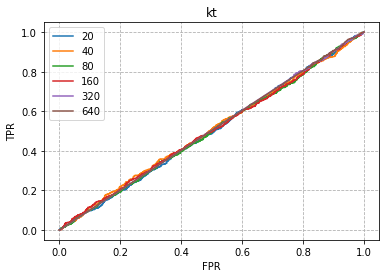

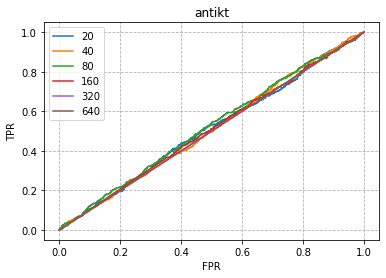

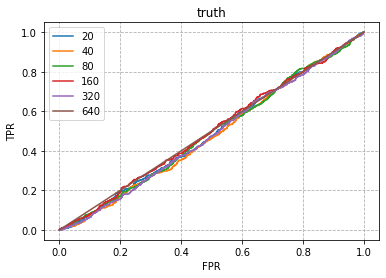

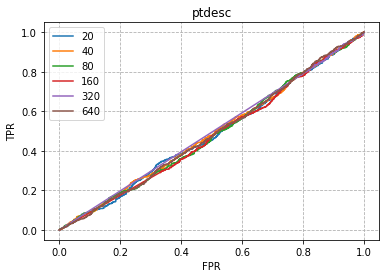

In [230]:

for j in range(len(jet_algorithms)):
    for k in range(j*len(hidden_dims),(j+1)*len(hidden_dims)):
        plt.plot(results_dictionary[k]['fpr'],results_dictionary[k]['tpr'],label = results_dictionary[k]['hidden'])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(results_dictionary[k]['algorithm'])
    plt.legend()
    plt.grid(which='both',axis='both',linestyle='--')
    plt.show()

In [234]:
[results_dictionary[k]['loss'] for k in range(len(results_dictionary))]

[0.7014994121366932,
 0.6945849695513325,
 0.7002077458366271,
 0.6957969588618125,
 0.6936278535473731,
 0.6934493328294447,
 0.6947982388157998,
 0.6935935001219472,
 0.6941913875841326,
 0.6954766569599029,
 0.6931761349401167,
 0.6931723538906344,
 0.6976742965559806,
 0.7018886102784064,
 0.7050345876524525,
 0.7066942761021275,
 0.7039825772085497,
 0.693142008396887,
 0.6970359952219071,
 0.6960680359794248,
 0.6954749428456829,
 0.6955978216663483,
 0.6945672563968166,
 0.6939358374764842]

In [100]:
def plotvepoch(key,xlabel,ylabel):
    for j in range(len(jet_algorithms)):
        for k in range(j*len(hidden_dims),(j+1)*len(hidden_dims)):
            plt.plot(metrics_history[k][1][key], label=metrics_history[k][0][1])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(metrics_history[k][0][0])
        plt.legend()
        plt.grid(which='both',axis='both',linestyle='--')
        plt.show()

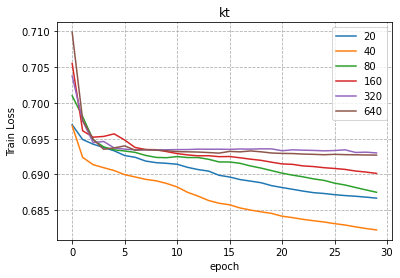

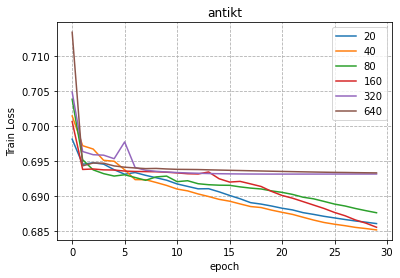

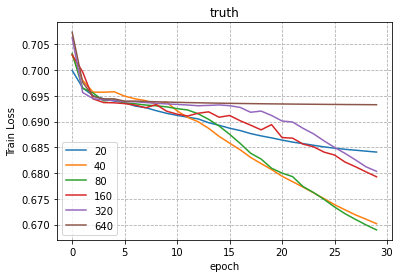

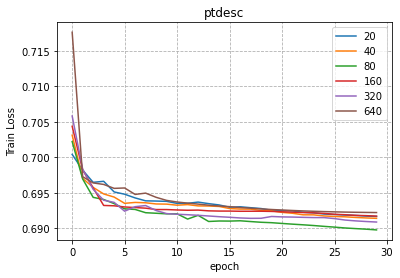

In [101]:
plotvepoch('train_loss','epoch','Train Loss')

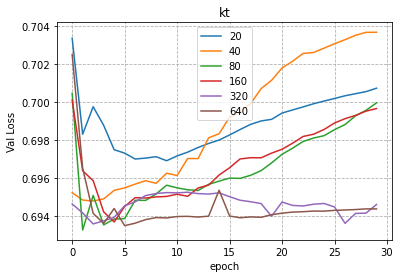

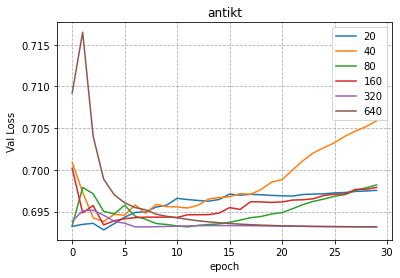

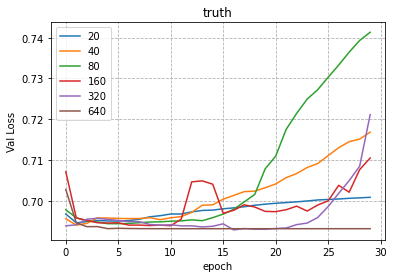

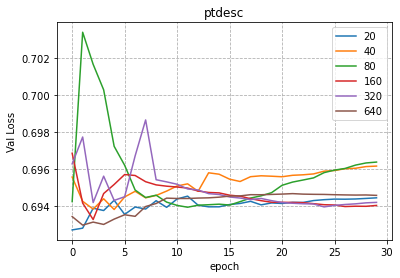

In [102]:
plotvepoch('val_loss','epoch','Val Loss')

In [103]:
print(metrics_history[0][1].keys())
print(metrics_test_best[0][1].keys())
print(metrics_val_best[0][1].keys())

dict_keys(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy', 'val_bg_reject'])
dict_keys(['accuracy', 'loss', 'auc', 'test_bg_reject'])
dict_keys(['accuracy', 'loss'])


In [113]:
metrics_test_best[0][1]['test_bg_reject']

3.307692307692308

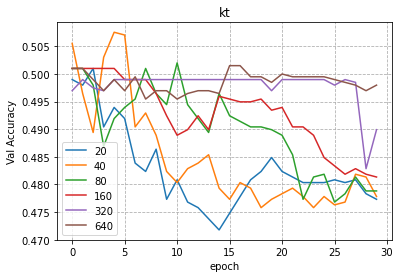

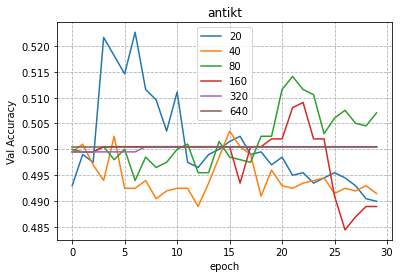

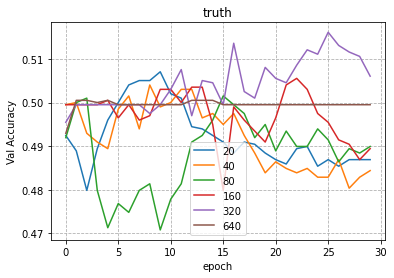

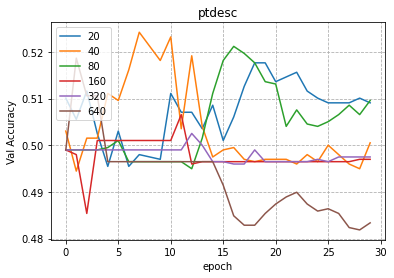

In [104]:
plotvepoch('val_accuracy','epoch','Val Accuracy')

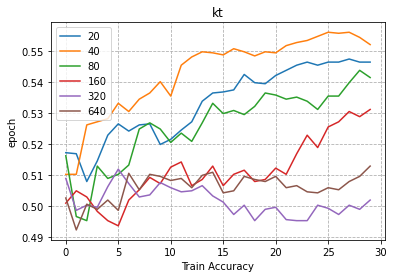

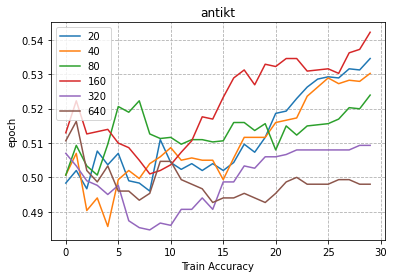

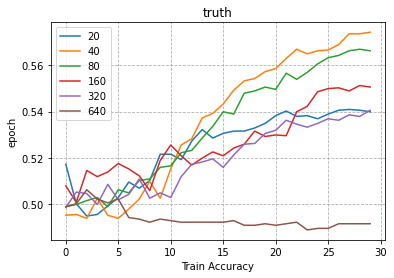

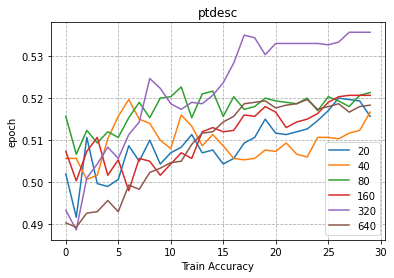

In [99]:
plotvepoch('train_accuracy','epoch','Train Accuracy')

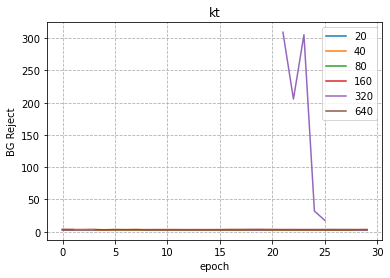

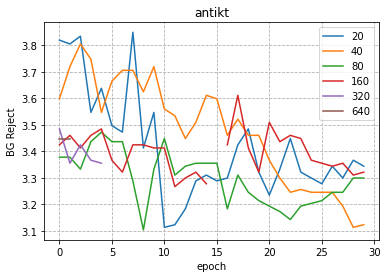

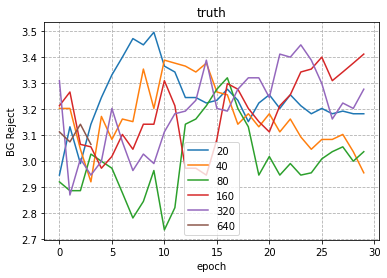

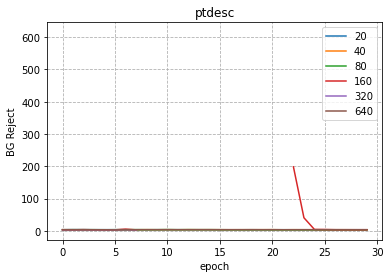

In [110]:
plotvepoch('val_bg_reject','epoch','BG Reject')